In [18]:
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar el archivo csv con los datos
df = pd.read_csv("https://raw.githubusercontent.com/Stevennns/Proyecto-Mineria-de-datos-2023-1/main/datos.csv")

# Eliminar los hashtags, menciones, enlaces y puntuación
def clean_text(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9]+)|([0-9A-Za-z\t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text

df["text"] = df["text"].apply(clean_text)

# Tokenizar y lematizar el texto
nlp = spacy.load("en_core_web_sm")
def lemmatize(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return lemmas

df["text"] = df["text"].apply(lemmatize)

# Eliminar las palabras vacías
stop_words = spacy.lang.en.stop_words.STOP_WORDS
def remove_stopwords(text):
    words = [word for word in text if word not in stop_words]
    return words

df["text"] = df["text"].apply(remove_stopwords)

# Extraer las características usando el valor tf-idf
def join_text(text):
    return " ".join(text)

df["text"] = df["text"].apply(join_text)
df["text"]


0                    
1                    
2                    
3                    
4                    
             ...     
17539                
17540                
17541                
17542                
17543                
Name: text, Length: 17544, dtype: object

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


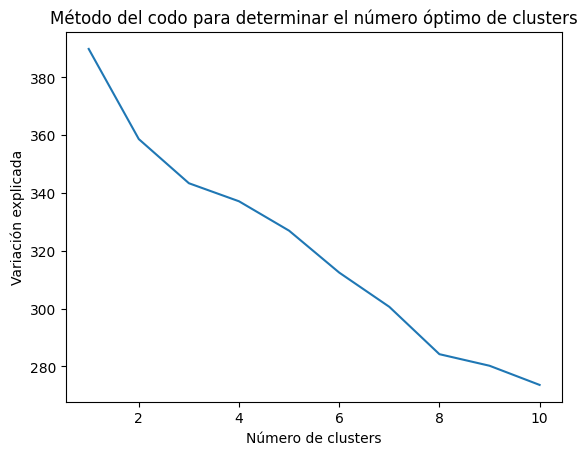

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["text"])

# Definir un rango de valores para el número de clusters
k_range = range(1, 11)

# Crear una lista vacía para guardar los valores de la variación explicada
sse = []

# Iterar sobre el rango de valores de k y aplicar el algoritmo K-Means con cada valor
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar la lista de valores de la variación explicada en función del rango de valores de k
plt.plot(k_range, sse)
plt.title("Método del codo para determinar el número óptimo de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Variación explicada")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
y = kmeans.fit_predict(X)
df["cluster"] = y


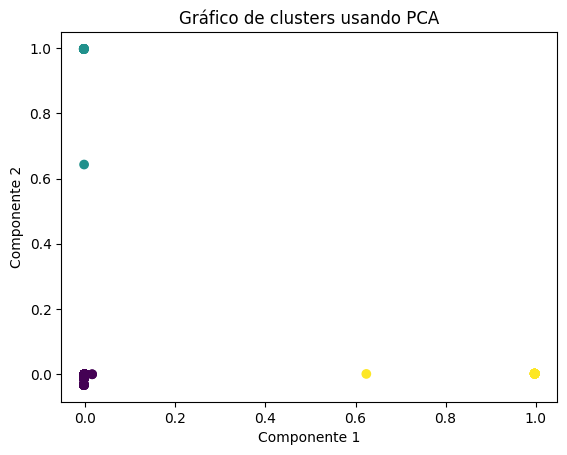

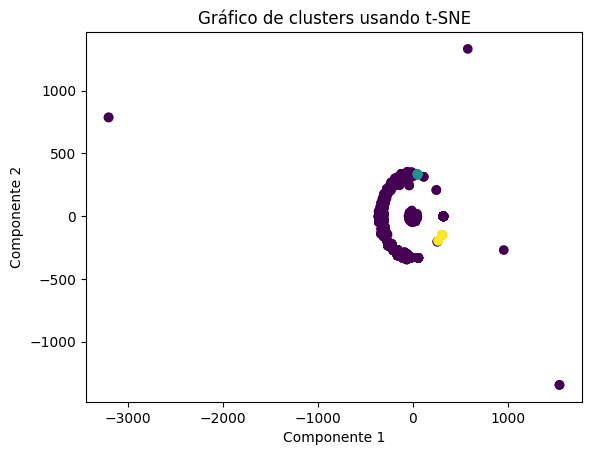

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Gráfico de clusters usando PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

# Usando t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.toarray())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title("Gráfico de clusters usando t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


In [17]:
df['text']

0                    
1                    
2                    
3                    
4                    
             ...     
17539                
17540                
17541                
17542                
17543                
Name: text, Length: 17544, dtype: object